In [1]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [18]:
look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [19]:
# file loader
# sydtpath = "D:\sydt"
# naturalEndoTekCode = "A168330"
fullpath = 'A168330.csv'
pandf = pd.read_csv(fullpath, index_col="Date")
 
# convert nparray
nparr = pandf['Close'].values[::-1]
nparr.astype('float32')
#print(nparr)
 
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr.reshape(-1, 1))
 
# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

803 90


C:\Users\Keon\AppData\Local\conda\conda\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
801/801 [==============================] - 7s 9ms/step - loss: 0.0520
Epoch 2/20
801/801 [==============================] - 6s 8ms/step - loss: 0.0106
Epoch 3/20
801/801 [==============================] - 6s 8ms/step - loss: 0.0012
Epoch 4/20
801/801 [==============================] - 6s 8ms/step - loss: 9.3140e-04
Epoch 5/20
801/801 [==============================] - 6s 8ms/step - loss: 9.3390e-04
Epoch 6/20
801/801 [==============================] - 6s 8ms/step - loss: 9.4472e-04
Epoch 7/20
801/801 [==============================] - 6s 8ms/step - loss: 9.2154e-04
Epoch 8/20
801/801 [==============================] - 6s 8ms/step - loss: 9.2909e-04
Epoch 9/20
801/801 [==============================] - 6s 8ms/step - loss: 9.2684e-04
Epoch 10/20
801/801 [==============================] - 6s 8ms/step - loss: 9.0738e-04
Epoch 11/20
801/801 [==============================] - 6s 8ms/step - loss: 9.1668e-04
Epoch 12/20
801/801 [==============================] - 6s 8ms/step - loss: 

Train Score: 1050.57 RMSE
Predict the Close value of final day: 31374


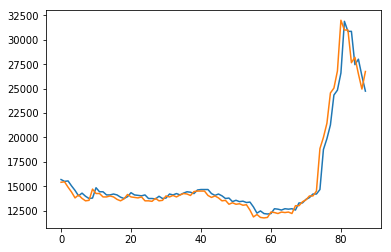

In [23]:
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)
 
# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day: %d' % lastY)  # 데이터 입력 마지막 다음날 종가 예측
 
# plot
plt.plot(testPredict)
plt.plot(testY)
plt.show()